Why is diabetes a challenge:

The burden of diabetes on the health care system mandates efforts to more optimally treat those with the disease and to prevent its development in those at risk. Early and intensive intervention in patients with diabetes reduces the risk of microvascular and macrovascular complications and disease progression. Current challenges in diabetes management include: (1) optimizing the use of currently available therapies to ensure adequate glycemic, blood pressure, and lipid control and to reduce complications; (2) educating patients on diabetes self-management; (3) improving patient adherence to lifestyle and pharmacologic interventions; (4) reducing barriers to the early use of insulin; and (5) improving the delivery of health care to people with chronic conditions.

Now we have a dataset related to diabetes.Now we will analyse the data and findout the factors.

Problem Statements or Aims:

 

1.    What are the major factors associated with diabetes? 
2.    Analysis of the non-diabetic population and diabetic population
3.   Need to examine the relationship between features
4.   Distributions of the features







**Diabetes Prediction:**

Here we have a dataset called Pima Indians Diabetes dataset. This dataset is a part of the large dataset held at the National Institute of Diabetes Digestive Kidney Diseases in the USA. Data used for diabetes research on Pima Indian women aged 21 and over living in Phoenix, the 5th largest city of the state of Arizona in the USA. The target variable is specified as 'Outcome'. Outcome 1 indicates positive diabetes test result, O indicates negative.

**Attribute Information:**

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration 2 hours in an oral glucose tolerance test

Blood Pressure: Diastolic blood pressure (mm Hg)

Skin Thickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

Diabetes Pedigree Function: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic



 We’ll be using Python and some of its popular data science related packages. First of all, we will import pandas to read our data from a CSV file and manipulate it for further use. We’ll use seaborn and matplotlib for visualizations.

#Load libraries and read the data

Loading libraries:

In [129]:
import numpy as np  # As required for pandas
import pandas as pd # importing pandas to read the data
import matplotlib.pyplot as plt # importing pyplot for visualization
import seaborn as sns # importing seaborn for visualization
import missingno as msno # importing missingno for exploratory visualization of missing data.

Reading the data:

In [131]:
variables = pd.read_excel("/content/Variables_diabetes_EDA.xlsx") # dataset name
df = pd.read_excel("/content/diabetes_mandatory_EDA.xlsx", names=variables["Variables used"]) # here reading the datafile and giving colnames as names from another excel file.
df.head() # head() function helps to display first 5 lines of the dataset.

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
1,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0


Shape: It tells number of columns and rows in the dataset.

In [132]:
df.shape # to get number of rows & columns in the dataset.

(767, 9)

Info: It tells the information about the dataset.Information consists of  number of rows, number of columns and data type of the columns.

In [133]:
df.info() # information about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 767 non-null    float64
 1   Glucose                     767 non-null    float64
 2   Blood Pressure              767 non-null    float64
 3   Skin Thickness              767 non-null    float64
 4   Insulin                     767 non-null    float64
 5   BMI                         767 non-null    float64
 6   Diabetes Pedigree Function  767 non-null    float64
 7   Age                         767 non-null    float64
 8   Outcome                     767 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


By looking at the above input, I Observed some points. Those are

*   Column names contain spaces but it is not good to use with spaces.So I will change the column names for easy to use.



Renaming the columns:

In [134]:
df.rename(columns = {'Blood Pressure':'BloodPressure','Skin Thickness':'SkinThickness','Diabetes Pedigree Function':'DiabetesPedigreeFunction'}, inplace = True)

Changing the data type of the Outcome variable:

Now, we can see the column names are changed and data type is also changed.We can see the by using info() function.

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    float64
 1   Glucose                   767 non-null    float64
 2   BloodPressure             767 non-null    float64
 3   SkinThickness             767 non-null    float64
 4   Insulin                   767 non-null    float64
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    float64
 8   Outcome                   767 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


**Basic Exploration and Exploratory Analysis**

In [55]:
df.describe() # statistical summary of the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Now we can check the null values are present in our dataset or not by using isnull() function:


*  Isnull: It tells how many null values are there in the each column.



In [136]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

By looking at the above output we do not have any null values in the given dataset. Now we are trying to find out the 0 values in each column except Pregnancies and Outcome variables.Because in preganancies column can contain 0 values, It means she never get pregnancy before. In the Outcome column 0 means non-diabetic, 1 means diabetic.

Detecting 0 values from the each variable in the given dataset:

In [137]:
(df.Glucose == 0).sum(), (df.BloodPressure == 0).sum(), (df.SkinThickness == 0).sum(),(df.Insulin == 0).sum(),(df.BMI == 0).sum(), (df.DiabetesPedigreeFunction == 0).sum(), (df.Age == 0).sum()   

(5, 35, 227, 373, 11, 0, 0)

So here we observed that we have some 0 values in some columns 
like Glucose, BloodPressure etc,.

Does it make sense to have 0's? No Sence because

*  How can a living person have 0 BoolPressure
*  How can a living person have 0 SkinThickness
*  How can a living person have 0 Insulin



So in the above columns, 0's means the value was simply
not captured or unavailable keeping 0's in those columns
are preposterous.

Thus, We need to replace those preposterous 0's with something.
First of all, I will replace all those those 0's with NaN by using replace function.

In [138]:
# Replacing zero values with NaN
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 

All preposterous 0's should have been changed to NaN's now.


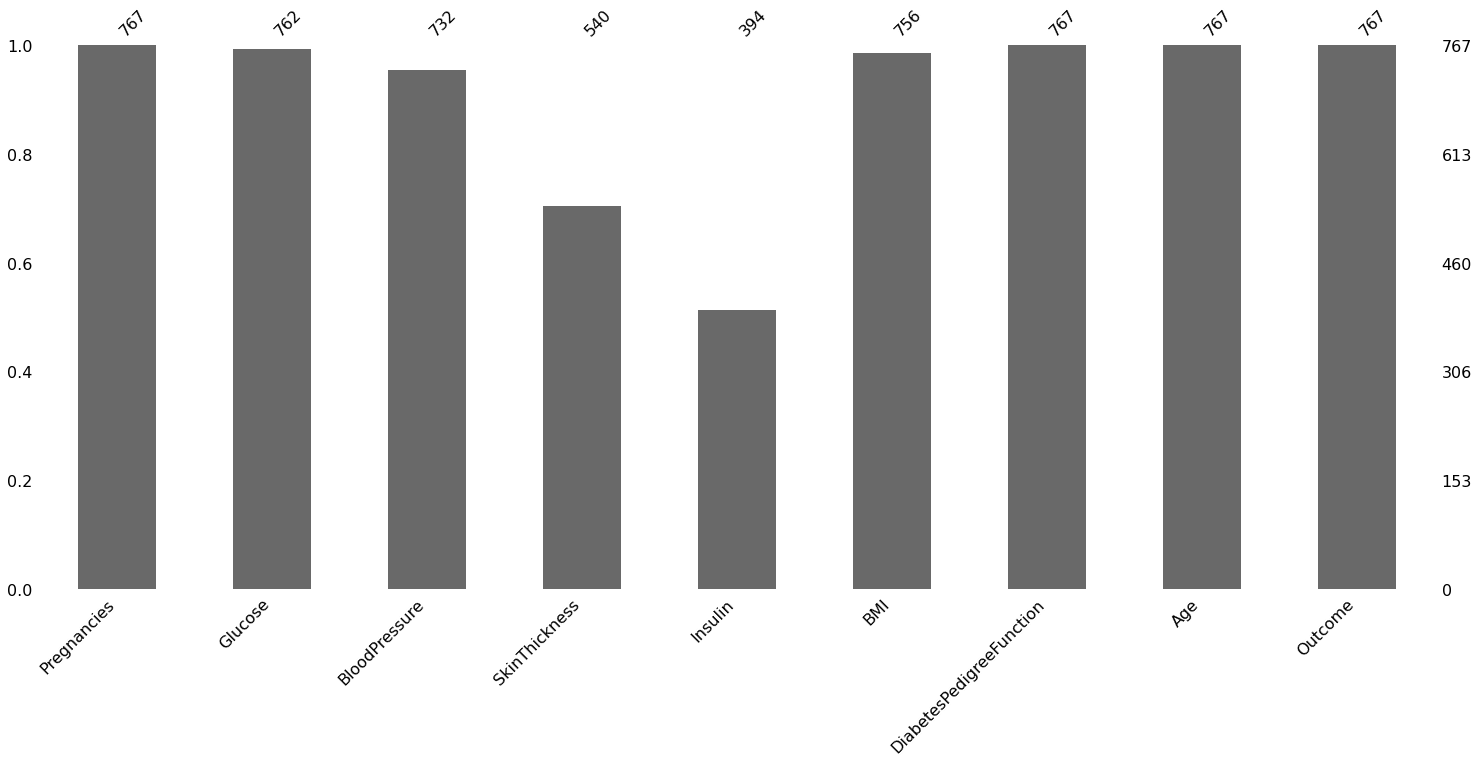

In [139]:
msno.bar(df) # exploratory visualization of missing data

Let's replace those new NaN values with the mean of
each column by using fillna() function

In [140]:
df.mean() # this shows the mean value for each column
df.fillna(df.mean(), inplace=True) # replace NaN with the mean
df.isnull().sum() # all 0, good to go all Nan's are gone

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

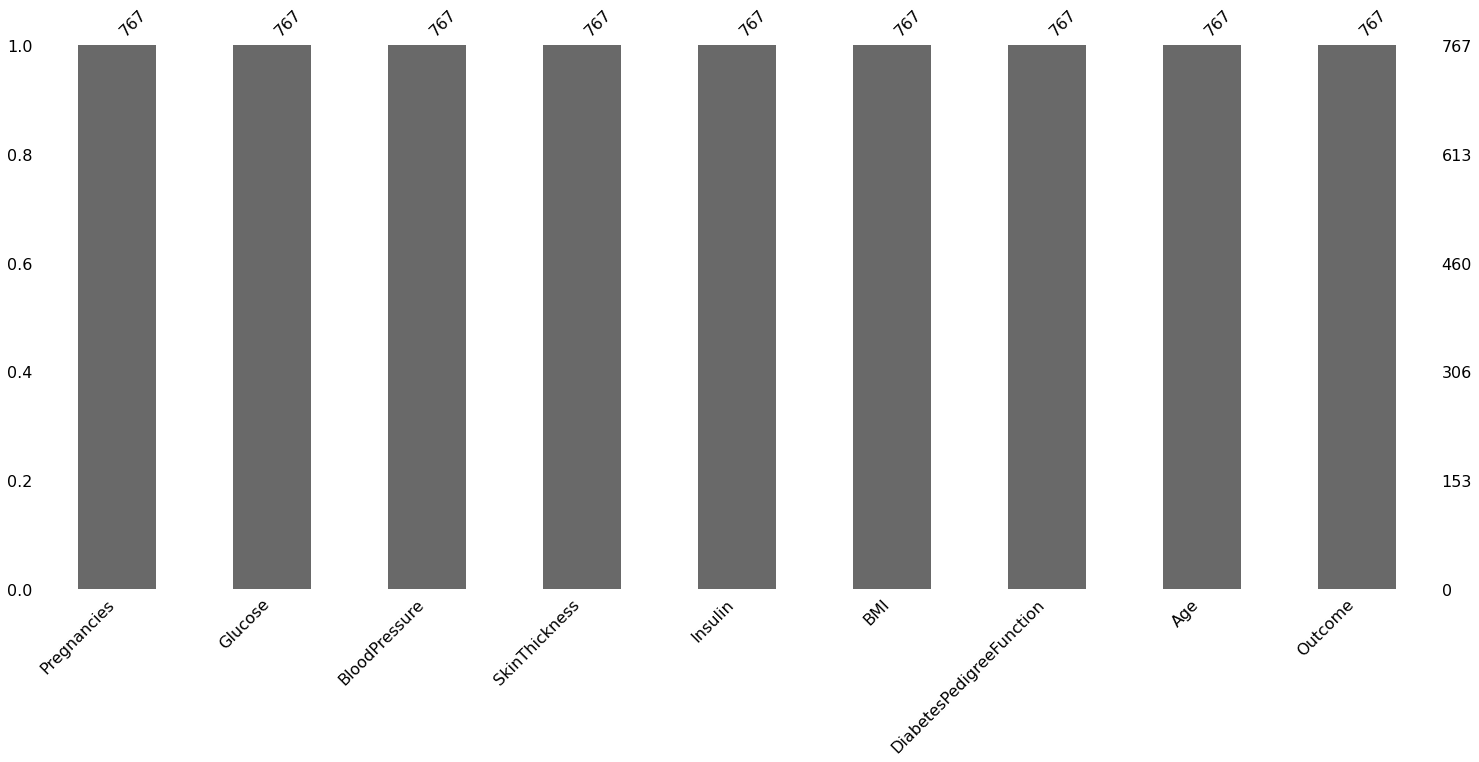

In [141]:
msno.bar(df)

**Univariate Analysis to see the distribution of all variables :**

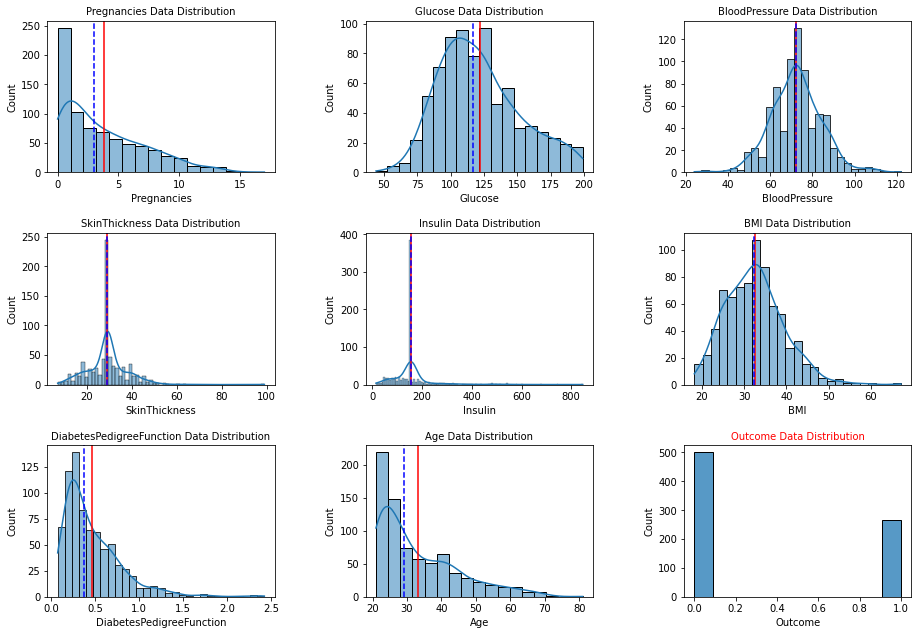

In [142]:
# To see the distribution of each columns
plt.figure(figsize=(15,10)) # Figure Size

plt.subplot(3,3,1)
sns.histplot(df['Pregnancies'], kde=True)
plt.axvline(x=df.Pregnancies.mean(),color='red',label='Mean') # To show the mean
plt.axvline(x=df.Pregnancies.median(),c='blue',ls='--',label='Median') # To show the Median # to show the distribution of the Preganacies variable
plt.title("Pregnancies Data Distribution", fontsize=10) # title of the plot

plt.subplot(3,3,2)
sns.histplot(df['Glucose'], kde=True)# to show the distribution of the Glucose variable
plt.axvline(x=df.Glucose.mean(),color='red',label='Mean') # To show the mean
plt.axvline(x=df.Glucose.median(),c='blue',ls='--',label='Median') # To show the Median
plt.title("Glucose Data Distribution", fontsize=10)

plt.subplot(3,3,3)
sns.histplot(df['BloodPressure'], kde=True)# to show the distribution of the BloodPressure variable
plt.axvline(x=df.BloodPressure.mean(),color='red',label='Mean') # To show the mean
plt.axvline(x=df.BloodPressure.median(),c='blue',ls='--',label='Median') # To show the Median
plt.title("BloodPressure Data Distribution", fontsize=10) # title of the plot


plt.subplot(3,3,4)
sns.histplot(df['SkinThickness'], kde=True)# to show the distribution of the SkinThickness variable
plt.axvline(x=df.SkinThickness.mean(),color='red',label='Mean') # To show the mean
plt.axvline(x=df.SkinThickness.median(),c='blue',ls='--',label='Median') # To show the Median
plt.title("SkinThickness Data Distribution", fontsize=10) # title of the plot

plt.subplot(3,3,5)
sns.histplot(df['Insulin'], kde=True)# to show the distribution of the Insulin variable
plt.axvline(x=df.Insulin.mean(),color='red',label='Mean') # To show the mean
plt.axvline(x=df.Insulin.median(),c='blue',ls='--',label='Median') # To show the Median
plt.title("Insulin Data Distribution", fontsize=10)# title of the plot

plt.subplot(3,3,6)
sns.histplot(df['BMI'], kde=True)# to show the distribution of the BMI variable
plt.axvline(x=df.BMI.mean(),color='red',label='Mean') # To show the mean
plt.axvline(x=df.BMI.median(),c='blue',ls='--',label='Median') # To show the Median
plt.title("BMI Data Distribution", fontsize=10)# title of the plot

plt.subplot(3,3,7)
sns.histplot(df['DiabetesPedigreeFunction'], kde=True)# to show the distribution of the DiabetesPedigreeFunction variable
plt.axvline(x=df.DiabetesPedigreeFunction.mean(),color='red',label='Mean') # To show the mean
plt.axvline(x=df.DiabetesPedigreeFunction.median(),c='blue',ls='--',label='Median') # To show the Median
plt.title("DiabetesPedigreeFunction Data Distribution", fontsize=10) #title of the plot

plt.subplot(3,3,8)
sns.histplot(df['Age'], kde=True)# to show the distribution of the Age variable
plt.axvline(x=df.Age.mean(),color='red',label='Mean') # To show the mean
plt.axvline(x=df.Age.median(),c='blue',ls='--',label='Median') # To show the Median
plt.title("Age Data Distribution", fontsize=10) #title of the plot


plt.subplot(3,3,9)
sns.histplot(df['Outcome']) # to show the distribution of the Outcome variable
plt.title("Outcome Data Distribution", fontsize=10, color='red') #title of the plot

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) # used to adjust the space between subplots.

plt.show()

By looking at the above output I have found that

Pregnancies, DiabetesPedigreeFunction, Age are right skewed. For this I'm apply log transformation to the skewed data.



/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Age Data Distribution')

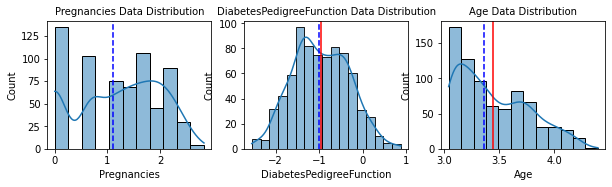

In [148]:
plt.rcParams['figure.figsize'] =[10,8]
plt.subplot(3,3,1)
data_trans = np.log(df['Pregnancies'])
sns.histplot(data_trans, kde=True)
plt.axvline(x=data_trans.mean(),color='red',label='Mean') # To show the mean
plt.axvline(x=data_trans.median(),c='blue',ls='--',label='Median') # To show the Median # to show the distribution of the Preganacies variable
plt.title("Pregnancies Data Distribution", fontsize=10) # title of the plot

plt.subplot(3,3,2)
data_log = np.log(df['DiabetesPedigreeFunction'],)
sns.histplot(data_log, kde=True)# to show the distribution of the DiabetesPedigreeFunction variable
plt.axvline(x=data_log.mean(),color='red',label='Mean') # To show the mean
plt.axvline(x=data_log.median(),c='blue',ls='--',label='Median') # To show the Median
plt.title("DiabetesPedigreeFunction Data Distribution", fontsize=10) #title of the plot

plt.subplot(3,3,3)
data_tra = np.log(df['Age'])
sns.histplot(data_tra, kde=True)# to show the distribution of the Age variable
plt.axvline(x=data_tra.mean(),color='red',label='Mean') # To show the mean
plt.axvline(x=data_tra.median(),c='blue',ls='--',label='Median') # To show the Median
plt.title("Age Data Distribution", fontsize=10) #title of the plot



Even thoug I applied the log transformation but the data is not distributed normally. Slightly the diabetes pedigree function changed.

This is the another way  to see the distribution of the Outcome variable. It is categorical data that's why I'm going to use the pie plot.

0.0    500
1.0    267
Name: Outcome, dtype: int64


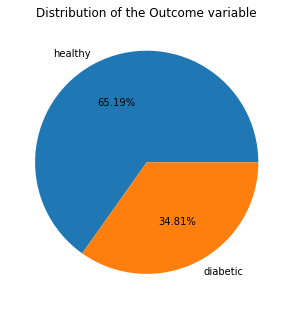

In [149]:
plt.rcParams['figure.figsize'] = [5,8]
plt.pie(x=df['Outcome'].value_counts(), data=df, labels = ['healthy','diabetic'], autopct='%1.2f%%')
plt.title("Distribution of the Outcome variable")
print(df['Outcome'].value_counts())

By looking at the above input, I can say that 65% people are non-diabetic and 34% of the people are diabetic in our dataset.

**Correlation of the data:**

To quickly see all pairwise correlations of the features.
We can just use corr( ).

In [64]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127288,0.208606,0.082393,0.056042,0.021432,-0.033927,0.544018,0.221087
Glucose,0.127288,1.000000,0.218514,0.192368,0.420365,0.230872,0.136620,0.265409,0.492225
BloodPressure,0.208606,0.218514,1.000000,0.192833,0.072517,0.281280,-0.002744,0.325088,0.166336
SkinThickness,0.082393,0.192368,0.192833,1.000000,0.158185,0.542475,0.100690,0.126715,0.214407
Insulin,0.056042,0.420365,0.072517,0.158185,1.000000,0.166589,0.098648,0.136915,0.214672
BMI,0.021432,0.230872,0.281280,0.542475,0.166589,1.000000,0.153323,0.025245,0.312015
DiabetesPedigreeFunction,-0.033927,0.136620,-0.002744,0.100690,0.098648,0.153323,1.000000,0.032738,0.173245
Age,0.544018,0.265409,0.325088,0.126715,0.136915,0.025245,0.032738,1.000000,0.236417
Outcome,0.221087,0.492225,0.166336,0.214407,0.214672,0.312015,0.173245,0.236417,1.000000


We can use seaborn module's heatmap() to better visualize
correlation matrix.

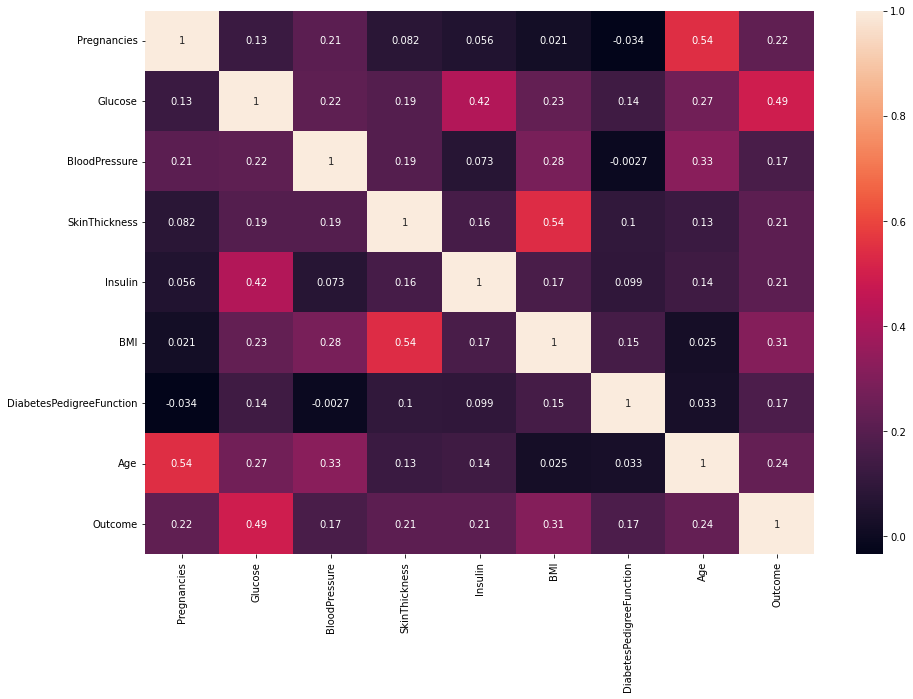

In [65]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10] # figure size

sns.heatmap(df.corr(), annot = True) # adding annot = True to see the actual correlation value.
plt.show()

So, 3 features that have the highest correlation with
Outcome are :
 Glucose, BMI, Age

**Bivariate analysis to see the relationship:**


By looking at the heat map, I can say that those columns have high correlation.
 *  Pregnancies and Age
 *  Glucose and Insulin
 *  SkinThickness and BMI
 *  BloodPressure and Age

 So, for those columns I will draw the scatterplot to see the relationship between them.

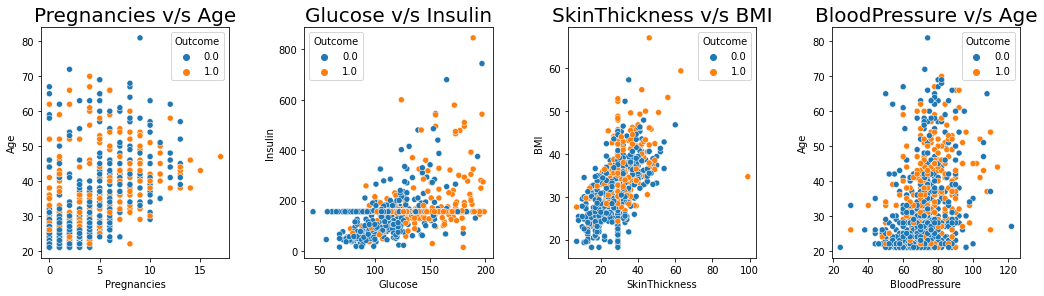

In [100]:
plt.figure(figsize=(17,4))

plt.subplot(1,4,1)
sns.scatterplot(x='Pregnancies', y='Age', hue='Outcome', data=df) # to see relatioship between Pregnancies and age
plt.title("Pregnancies v/s Age", fontsize=20) # title of the plot

plt.subplot(1,4,2)
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=df) # to see relatioship between Glucose and Insulin
plt.title("Glucose v/s Insulin", fontsize=20) # title of the plot

plt.subplot(1,4,3)
sns.scatterplot(x='SkinThickness', y='BMI', hue='Outcome', data=df) # to see relatioship between SkinThickness and BMI
plt.title("SkinThickness v/s BMI", fontsize=20) # title of the plot

plt.subplot(1,4,4)
sns.scatterplot(x='BloodPressure', y='Age', hue='Outcome', data=df) # to see relatioship between BloodPressure and age
plt.title("BloodPressure v/s Age", fontsize=20) # title of the plot

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) # used to adjust the space between subplots

plt.show()

Observations:

* The maximum data lies in the age of 20's to 40's.
* Surprisingly some people got pregnancy in the age between 50's to 70's even they have diabetis
* Glucose and insulin are positively correlate
* Maximum people have their BloodPressue 65 to 90.  


**Multivariate Analysis**

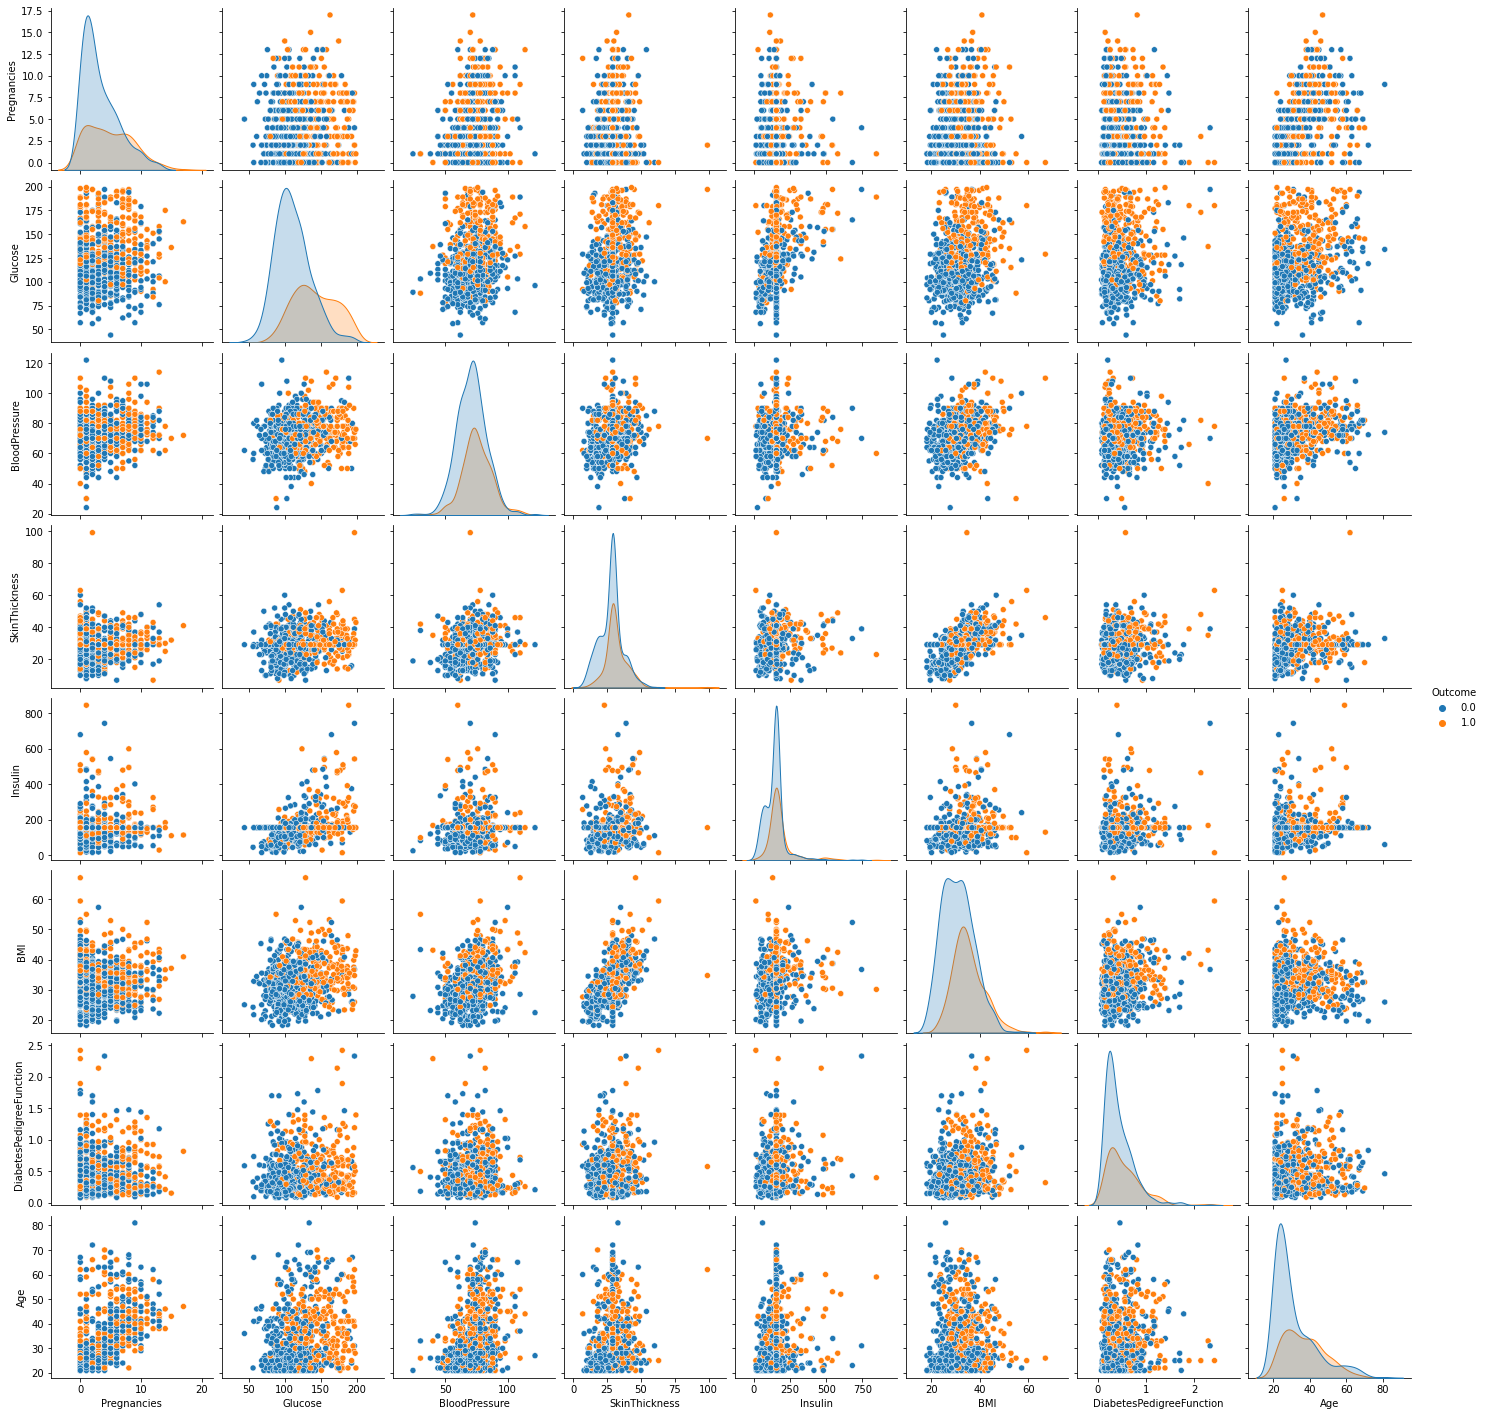

In [150]:
plt.rcParams['figure.figsize'] = [10,8]
sns.pairplot(df, hue = 'Outcome')
plt.show()

Pair graph for both diabetic and non-diabetic.The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables. For example, the left-most plot in the second row shows the scatter plot of Glucose versus Age

Observations:

  * Glucose, Insulin, DiabetesPedigreeFunction and age are      positivle Skewed
  * Insulin, BMI and DiabetesPedigreeFunction have a strong effect on the Skinthickness

**Finding Out Outliers:**

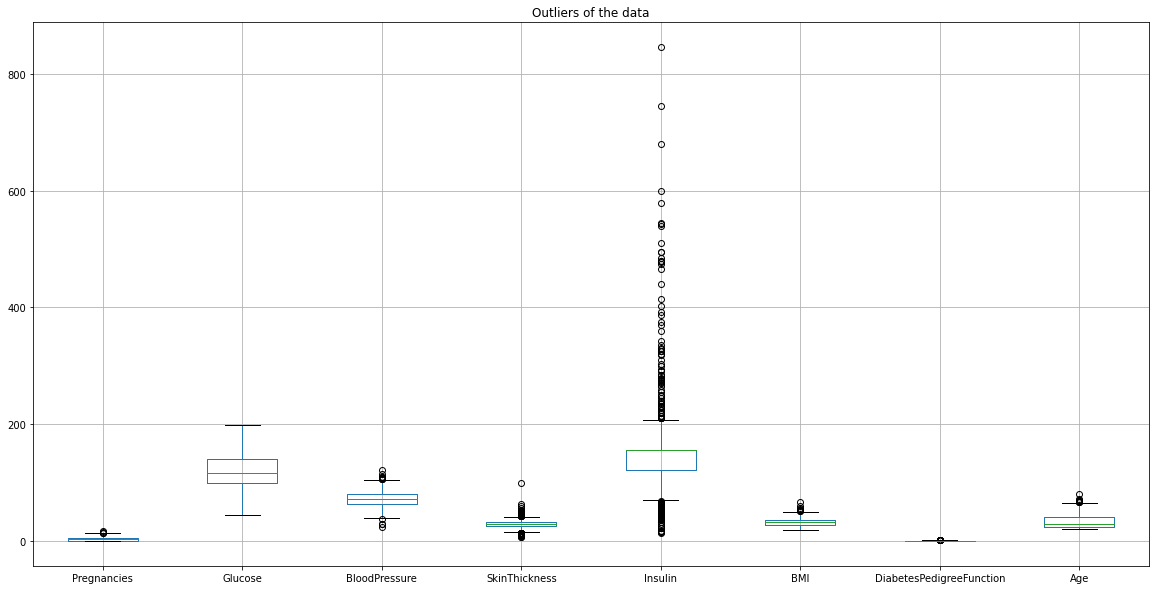

In [101]:
plt.rcParams['figure.figsize'] = [20, 10] # figure size
numeric_cols = ["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI","DiabetesPedigreeFunction", "Age"]
df.boxplot(numeric_cols) # to findout outliers
plt.title("Outliers of the data") # title of the data
plt.show()

By observing at the above graph we have some outliers in the 
Preganancies, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction and Age.

Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Hence it is of atmost importance to deal with them. In this case removing outliers can cause data loss so we have to deal with it using various scaling and transformation techniques.



**Feature Engineering**

**Feature Selection:**

Pearson's Correlation Coefficient : Helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

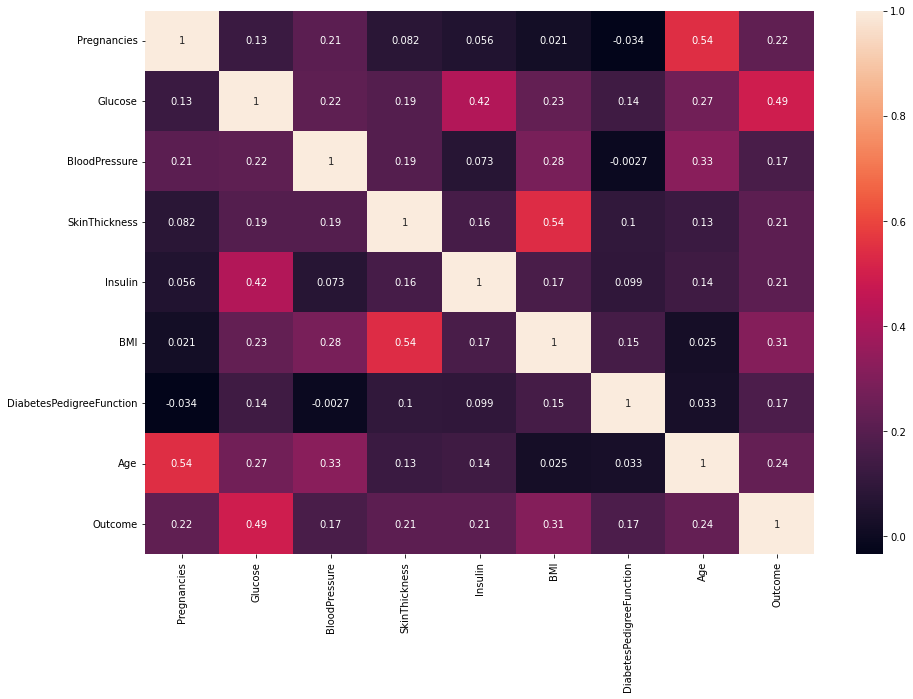

In [151]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10] # figure size

sns.heatmap(df.corr(), annot = True) # adding annot = True to see the actual correlation value.
plt.show()

So, 3 features that have the highest correlation with
Outcome are :
 Glucose, BMI, Age

Let's extract 3 features that the highest correlation with Outcome use nlargest(  ).

In [152]:
df.corr().nlargest(n=4, columns='Outcome')
# We need to put 4 here because Outcome will have correlation with itself
# We want 3(=4-1) features that are not Outcome (Itself)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.221087,0.492225,0.166336,0.214407,0.214672,0.312015,0.173245,0.236417,1.000000
Glucose,0.127288,1.000000,0.218514,0.192368,0.420365,0.230872,0.136620,0.265409,0.492225
BMI,0.021432,0.230872,0.281280,0.542475,0.166589,1.000000,0.153323,0.025245,0.312015
Age,0.544018,0.265409,0.325088,0.126715,0.136915,0.025245,0.032738,1.000000,0.236417



I just want to see the 3 names of the features that have
highest correlation with Outcome

Then I need to add just .index at the end.

In [153]:
df.corr().nlargest(n=4, columns='Outcome').index

Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')

Conclusion of the study:


   *  Glucose has higher correlation to insulin, but the more interesting thing is that BMI has higher correlation to Skinthickness
   *  We observe that only glucose and Blood Pressure  and BMI are normally distributed rest others are skewed and have outliers
   *  Observe the last row 'Outcome' and note its correlation scores with different features. We can observe that Glucose, BMI and Age are the most correlated with Outcome.
   * Glucose, BM1, and Age are the major factors associated with diabetes.
   